Proyek UAS Counterfeit Banknotes Classifier using CNN

Mohammad Darrel Tristan Budiroso
2006577302

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the file
uploaded = files.upload()

# Read the uploaded file
filename = next(iter(uploaded))
df = pd.read_csv(filename)

# Print the contents of the dataset
print(df.head()) #Prints the first few rows of the dataset.

Saving banknotes.csv to banknotes.csv
   conterfeit  Length   Left  Right  Bottom   Top  Diagonal
0           0   214.8  131.0  131.1     9.0   9.7     141.0
1           0   214.6  129.7  129.7     8.1   9.5     141.7
2           0   214.8  129.7  129.7     8.7   9.6     142.2
3           0   214.8  129.7  129.6     7.5  10.4     142.0
4           0   215.0  129.6  129.7    10.4   7.7     141.8


In [ ]:
#Provides summary statistics of the dataset.
df.describe()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,214.896000,130.121500,129.956500,9.417500,10.650500,140.483500
std,0.501255,0.376554,0.361026,0.404072,1.444603,0.802947,1.152266
min,0.000000,213.800000,129.000000,129.000000,7.200000,7.700000,137.800000
25%,0.000000,214.600000,129.900000,129.700000,8.200000,10.100000,139.500000
50%,0.500000,214.900000,130.200000,130.000000,9.100000,10.600000,140.450000
75%,1.000000,215.100000,130.400000,130.225000,10.600000,11.200000,141.500000
max,1.000000,216.300000,131.000000,131.100000,12.700000,12.300000,142.400000


In [ ]:
# Displays information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


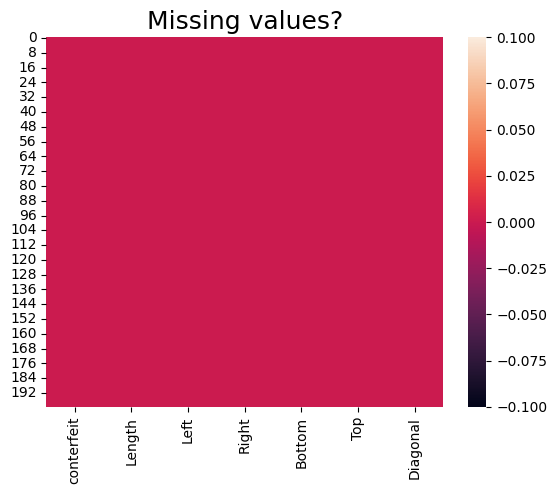

In [ ]:
# Creates a heatmap to visualize missing values in the dataset.
sns.heatmap(df.isnull())
plt.title("Missing values?", fontsize = 18)
plt.show()

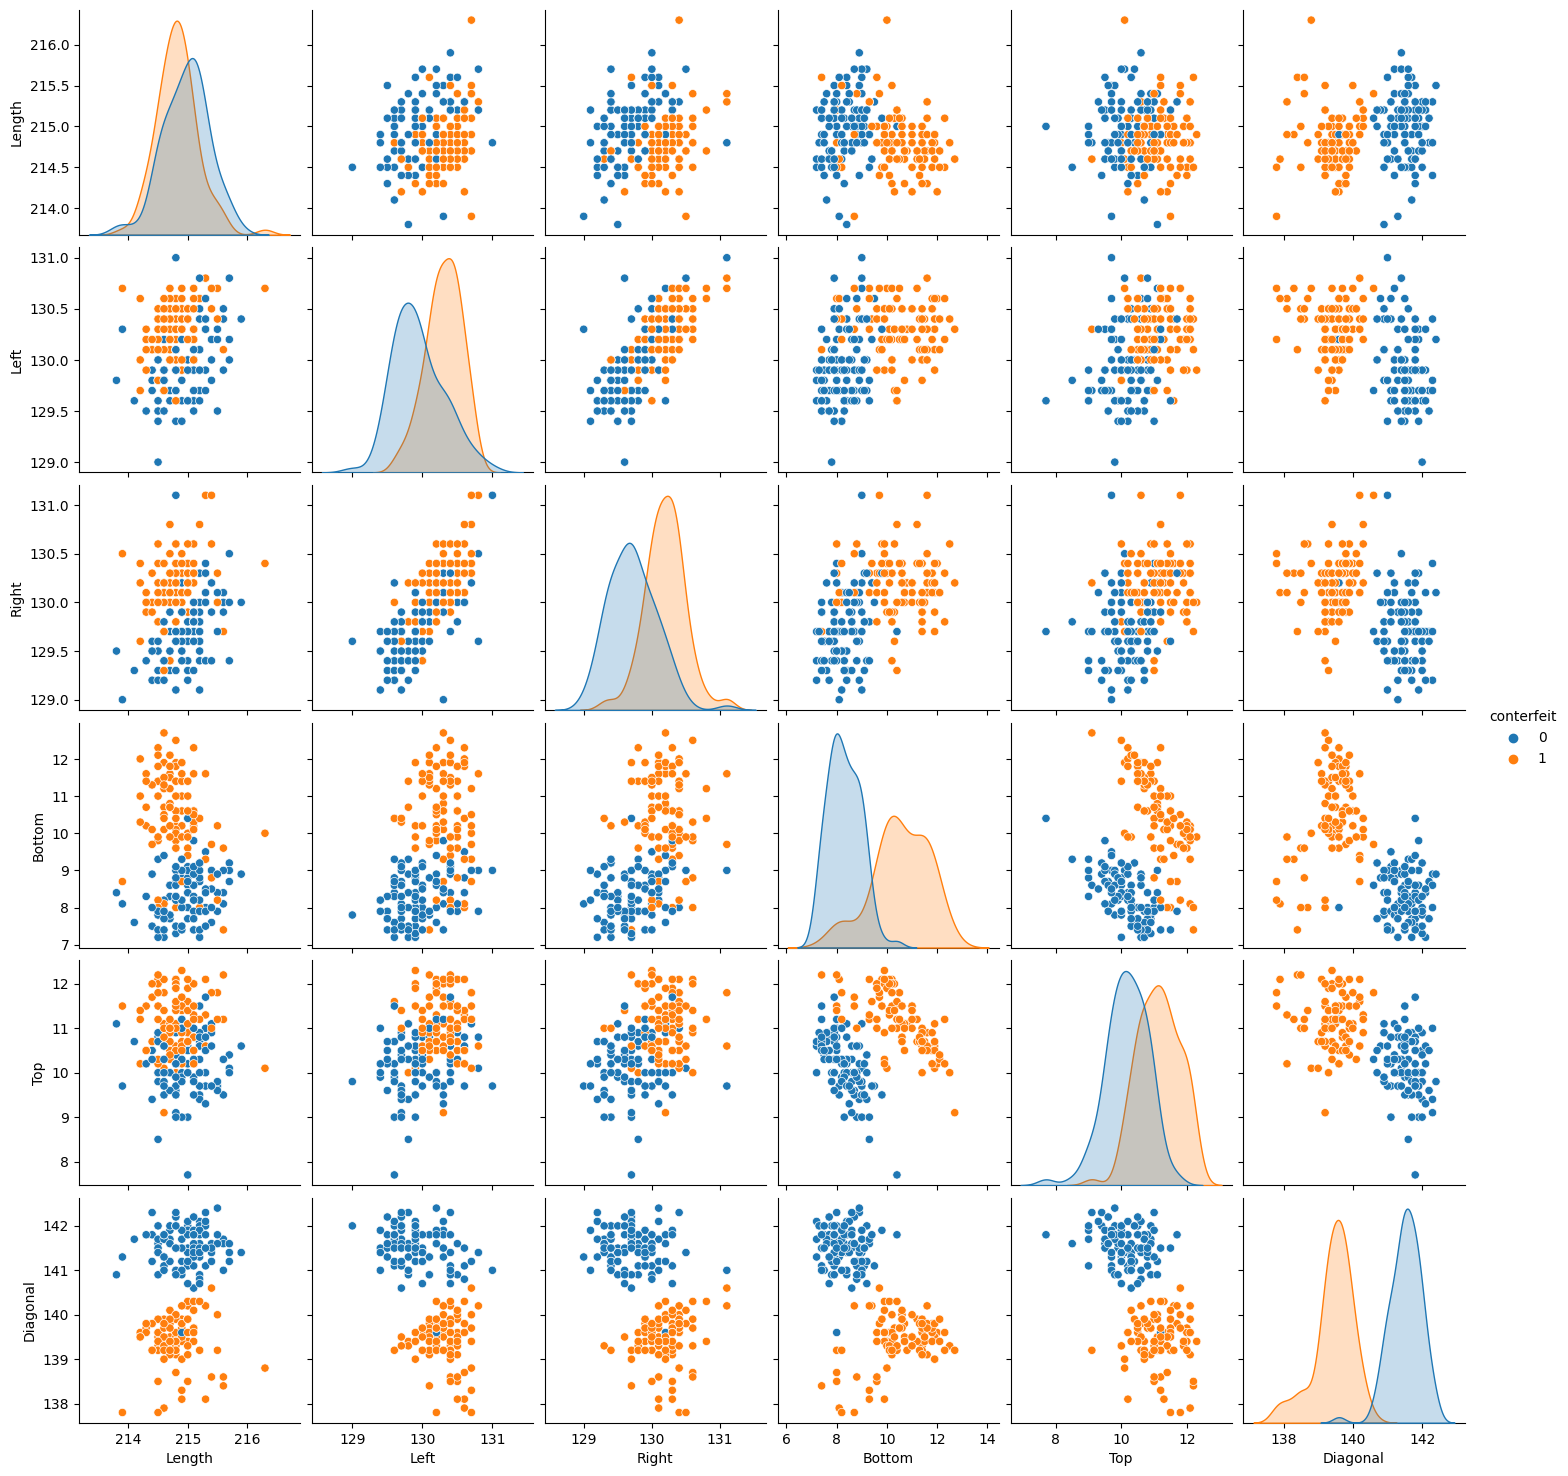

In [ ]:
# Pairwise relationships depending on counterfeit
#Generates pairwise scatter plots with respect to the "counterfeit" variable.
sns.pairplot(df, hue = "conterfeit")
plt.show()

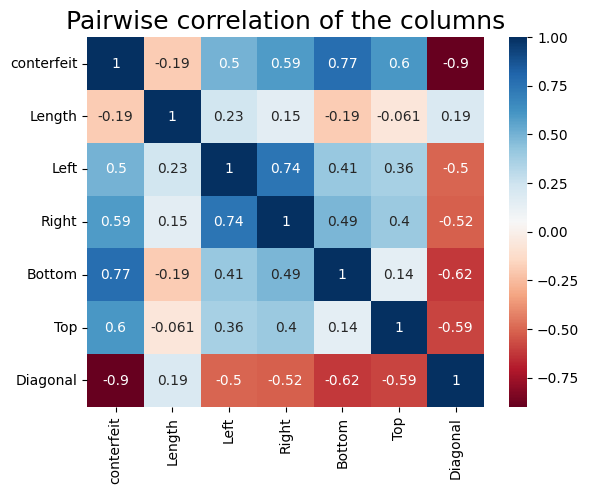

In [ ]:
#Creates a heatmap to visualize the correlation between columns.
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.title("Pairwise correlation of the columns", fontsize = 18)
plt.show()

In [ ]:
# Shuffle the dataset
df = df.reindex(np.random.permutation(df.index))

# Features and target variables are separated into X and y.
X = df.drop(columns = "conterfeit")
y = df["conterfeit"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)

In [ ]:
# Neural Network Model Training
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

# A neural network model is created using Sequential from tensorflow.keras.
model = Sequential()
model.add(Dense(6))
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train.values, epochs = 50, verbose = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

pred = model.predict(st.transform(X_test))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results = []
results.append(("LogisticRegression",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
 [[24  0]
 [ 0 16]]

Accuracy
 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

pred = rfc.predict(st.transform(X_test))

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results.append(("RandomForestClassifier",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
 [[24  0]
 [ 0 16]]

Accuracy
 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

pred = dtc.predict(st.transform(X_test))

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results.append(("DecisionTreeClassifier",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.94      1.00      0.97        16

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

Confusion Matrix
 [[23  1]
 [ 0 16]]

Accuracy
 0.975


In [ ]:
# Neural Network Model Evaluation
pred = model.predict(st.transform(X_test))
pred = [int(round(t)) for t in pred.reshape(1,-1)[0]]

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results.append(("Neural Network",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
 [[24  0]
 [ 0 16]]

Accuracy
 1.0
